Gender Pay Gap Project::
The aim of the project is to utilize the learnings from the IBM Data Analytics course. The data used for this project was acquired from the glass door dataset for analysing gender pay gap by different job titles. In this project, I have conducted data analysis and visualization with the help of IBM Cognos Analytics and Python coding. 

The gender pay gap is reported as six metrics or analyti:
1. mean gender pay gap2. 
median gender pay gap 3. 
mean bonus gender pay gap4.  
median bonus gender pay ga5. p 
proportion of males and females receiving a bonus paym6. ent
proportion of males and females in each quartile bAll the employees in the data have received bonus, therefore the fifth metric has not been measured.and
cs


In [2]:
import piplite
import micropip
await piplite.install(['pandas'])
await piplite.install(['matplotlib'])
await piplite.install(['scipy'])
await piplite.install(['seaborn'])
await micropip.install(['ipywidgets'],keep_going=True)
await micropip.install(['tqdm'],keep_going=True)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
import os
os.getcwd()


'/drive/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/jupyterlite/files'

In [12]:
df = pd.read_csv("/drive/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/jupyterlite/files/excel analysis-main.csv")
df.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,Seniority level,BasePay,Bonus,total_income,hourly pay
0,Graphic Designer,Female,18,5,College,Operations,2,associate,42363,9938,52301,25.144712
1,Software Engineer,Male,21,5,College,Management,5,senior,108476,11128,119604,57.501923
2,Warehouse Associate,Female,19,4,PhD,Administration,5,senior,90208,9268,99476,47.825000
3,Software Engineer,Male,20,5,Masters,Sales,4,high,108080,10154,118234,56.843269
4,Graphic Designer,Male,26,5,Masters,Engineering,5,senior,99464,9319,108783,52.299519


Cleaning the data

In [13]:
df.shape

(1000, 12)

In [14]:
df.columns

Index(['JobTitle', 'Gender', 'Age', 'PerfEval', 'Education', 'Dept',
       'Seniority', 'Seniority level', 'BasePay', 'Bonus', 'total_income',
       'hourly pay'],
      dtype='object')

In [37]:
df.rename(columns = {'hourly pay':'hourly_pay'}, inplace = True)
df.columns

Index(['JobTitle', 'Gender', 'Age', 'PerfEval', 'Education', 'Dept',
       'Seniority', 'Seniority level', 'BasePay', 'Bonus', 'total_income',
       'hourly_pay'],
      dtype='object')

In [38]:
df.dtypes

JobTitle            object
Gender              object
Age                  int64
PerfEval             int64
Education           object
Dept                object
Seniority            int64
Seniority level     object
BasePay              int64
Bonus                int64
total_income         int64
hourly_pay         float64
dtype: object

In [39]:
df.describe()

,Age,PerfEval,Seniority,BasePay,Bonus,total_income,hourly_pay
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,41.393000,3.037000,2.971000,94472.653000,6467.161000,100939.814000,48.528757
std,14.294856,1.423959,1.395029,25337.493272,2004.377365,25156.599655,12.094519
min,18.000000,1.000000,1.000000,34208.000000,1703.000000,40828.000000,19.628846
25%,29.000000,2.000000,2.000000,76850.250000,4849.500000,83443.000000,40.116827
50%,41.000000,3.000000,3.000000,93327.500000,6507.000000,100047.000000,48.099519
75%,54.250000,4.000000,4.000000,111558.000000,8026.000000,117656.000000,56.565385
max,65.000000,5.000000,5.000000,179726.000000,11293.000000,184010.000000,88.466346


In [40]:
#checking for missing value
df.isnull().head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,Seniority level,BasePay,Bonus,total_income,hourly_pay
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False


In [41]:
#segregating female data
female_data = df[df.Gender=='Female']
female_data.head()

,JobTitle,Gender,Age,PerfEval,Education,Dept,Seniority,Seniority level,BasePay,Bonus,total_income,hourly_pay
0,Graphic Designer,Female,18,5,College,Operations,2,associate,42363,9938,52301,25.144712
2,Warehouse Associate,Female,19,4,PhD,Administration,5,senior,90208,9268,99476,47.825000
5,IT,Female,20,5,PhD,Operations,4,high,70890,10126,81016,38.950000
6,Graphic Designer,Female,20,5,College,Sales,4,high,67585,10541,78126,37.560577
8,Graphic Designer,Female,33,5,High School,Engineering,5,senior,112976,9836,122812,59.044231


In [42]:
#segregating male data
male_data= df[df.Gender == 'Male']


In [43]:
female_data.describe()

,Age,PerfEval,Seniority,BasePay,Bonus,total_income,hourly_pay
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,41.829060,2.935897,3.012821,89942.818376,6474.012821,96416.831197,46.354246
std,13.804254,1.433820,1.389717,24378.277510,2009.473239,24202.157488,11.635653
min,18.000000,1.000000,1.000000,34208.000000,1884.000000,40828.000000,19.628846
25%,30.000000,2.000000,2.000000,73186.250000,4841.000000,80866.500000,38.878125
50%,42.000000,3.000000,3.000000,89913.500000,6553.000000,96571.000000,46.428365
75%,54.000000,4.000000,4.000000,106923.250000,8090.000000,112660.500000,54.163702
max,65.000000,5.000000,5.000000,160614.000000,10768.000000,168968.000000,81.234615


In [44]:
 male_data.describe()

,Age,PerfEval,Seniority,BasePay,Bonus,total_income,hourly_pay
count,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000,532.000000
mean,41.009398,3.125940,2.934211,98457.545113,6461.133459,104918.678571,50.441672
std,14.715184,1.410588,1.399958,25517.520327,2001.756231,25329.566633,12.177676
min,18.000000,1.000000,1.000000,36642.000000,1703.000000,41030.000000,19.725962
25%,28.000000,2.000000,2.000000,81452.500000,4853.250000,87791.750000,42.207572
50%,40.000000,3.000000,3.000000,98223.000000,6480.500000,105100.500000,50.529087
75%,55.000000,4.000000,4.000000,115606.250000,7989.000000,121617.000000,58.469712
max,65.000000,5.000000,5.000000,179726.000000,11293.000000,184010.000000,88.466346


Text(0.5, 1.0, ' Average hourly pay by gender')

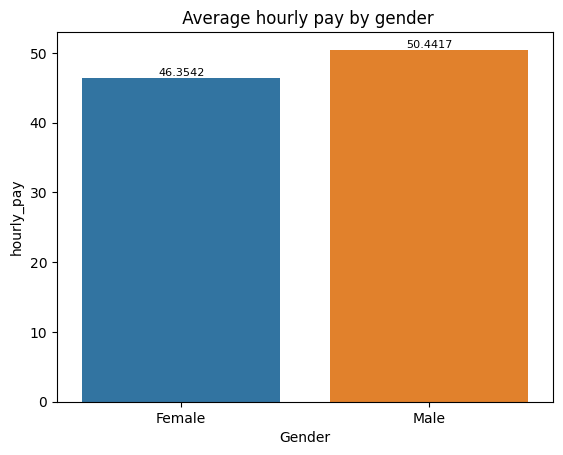

In [104]:
#mean hourly pay
ax= sns.barplot(df, x="Gender", y="hourly_pay", hue="Gender",errorbar= None)
ax.bar_label(ax.containers[0], fontsize=8)
ax.bar_label(ax.containers[1], fontsize=8)
plt.title(' Average hourly pay by gender', size = 12)

Text(0.5, 1.0, ' Average bonus pay by Gender')

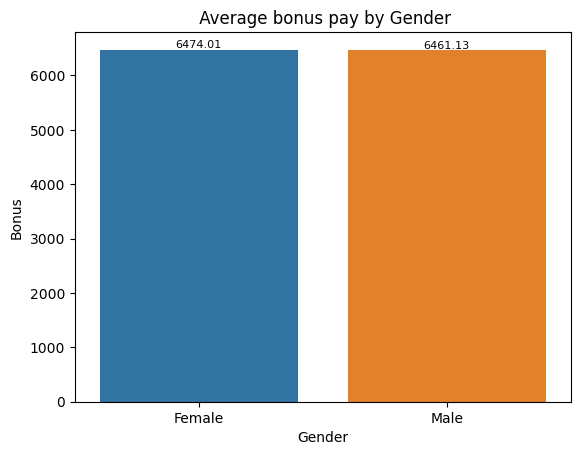

In [105]:
#avg bonus pay
ay= sns.barplot(df, x="Gender", y="Bonus", hue="Gender", errorbar= None)
ay.bar_label(ay.containers[0], fontsize=8)
ay.bar_label(ay.containers[1], fontsize=8)
plt.title(' Average bonus pay by Gender', size = 12)

<ipython-input-110-0e288a50567f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot( df, x='Seniority', y= 'BasePay', hue = "Gender" , marker = 'o', ci = None)


Text(0.5, 1.0, ' Average Base Pay by Seniority')

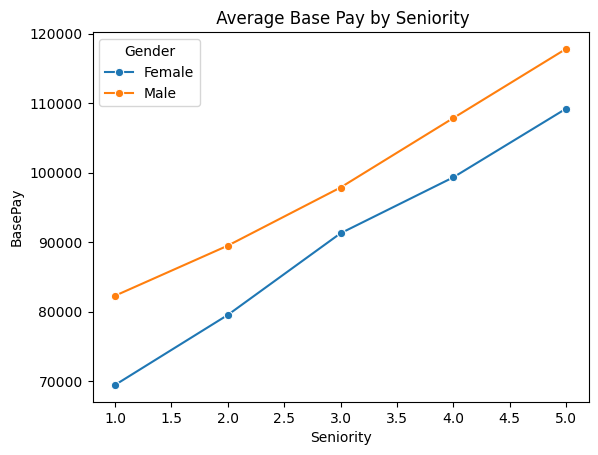

In [110]:
#basepay by seniority level in gender
sns.lineplot( df, x='Seniority', y= 'BasePay', hue = "Gender" , marker = 'o', ci = None)
plt.title(' Average Base Pay by Seniority', size = 12)

Text(0.5, 1.0, 'Gender distribution by jobs')

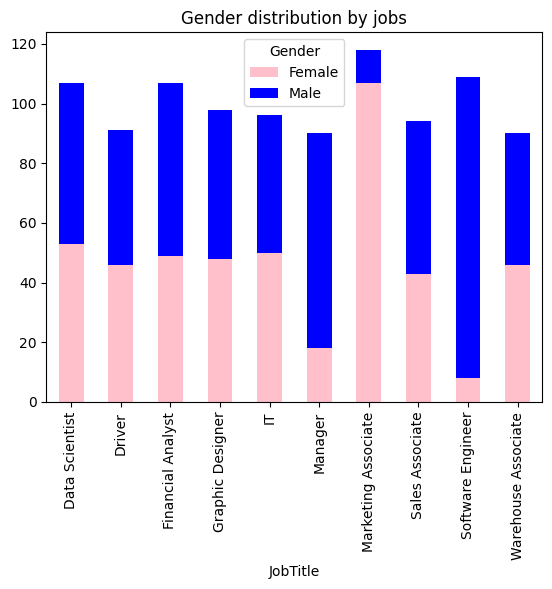

In [106]:
#Gender distribution in job titles
job_distr = df.pivot_table(index='JobTitle', columns='Gender', values= 'BasePay', aggfunc='count')
job_distr.plot(kind=  'bar', stacked = True, color = ['Pink','Blue'])
plt.title('Gender distribution by jobs', size = 12)

Text(0.5, 1.0, 'Median hourly pay by gender')

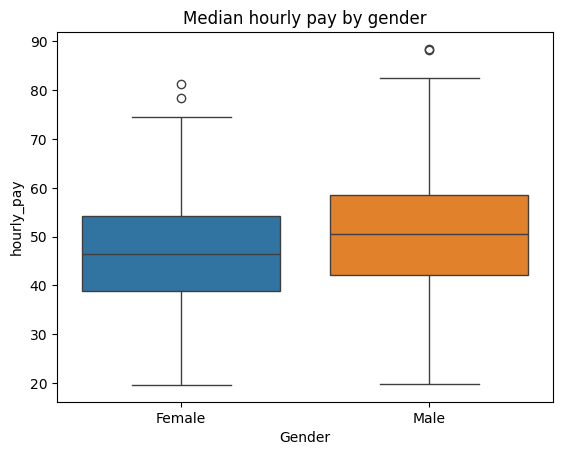

In [107]:
#median hourly pay
sns.boxplot(data =df, x='Gender',y = 'hourly_pay',hue='Gender')
plt.title('Median hourly pay by gender', size = 12)

Text(0.5, 1.0, 'Median bonus pay by gender')

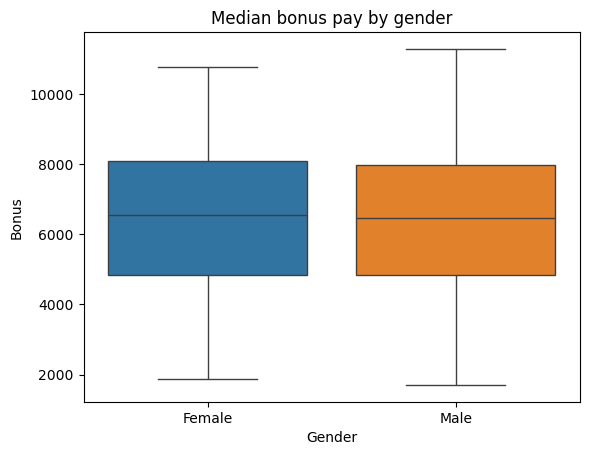

In [108]:
#median bonus pay
sns.boxplot(data =df, x='Gender',y = 'Bonus',hue='Gender')
plt.title('Median bonus pay by gender', size = 12)